In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

warnings.filterwarnings("ignore")


In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk("C:/Users/Neha/Desktop/TESS/TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [5]:
df = pd.DataFrame({"Path": paths, "Label": labels})

**EDA**

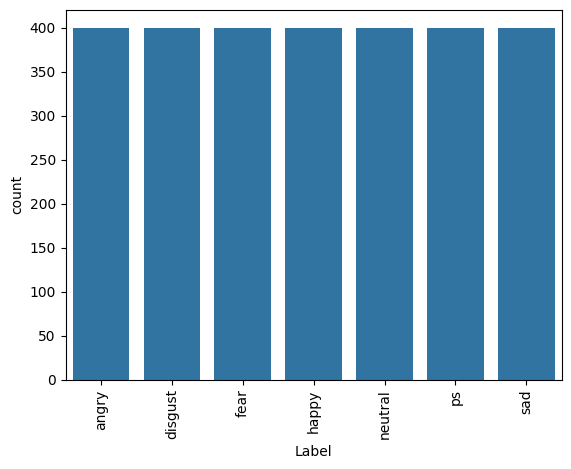

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.xticks(rotation='vertical')
sns.countplot(x="Label", data=df)
plt.show()


In [12]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()
emot=["angry","disgust","fear","happy","neutral","ps","sad"]


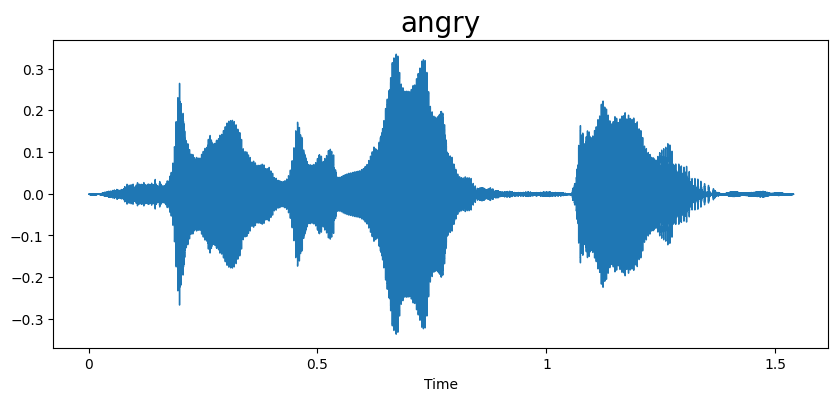

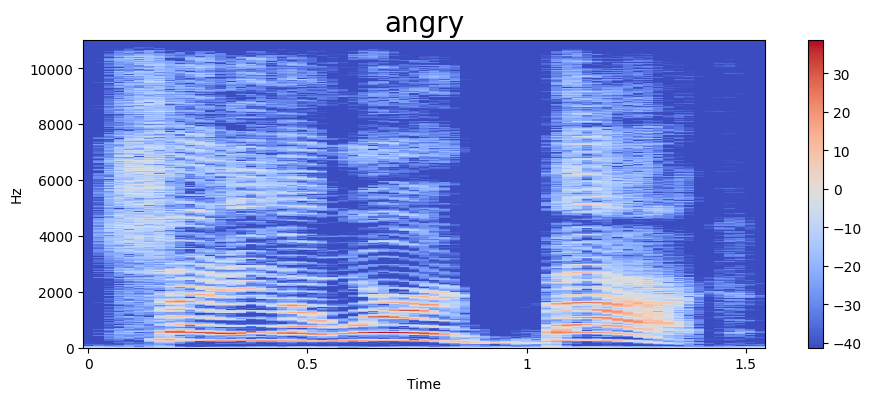

In [14]:
emotion=emot[0]
path=np.array(df["Path"][df["Label"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

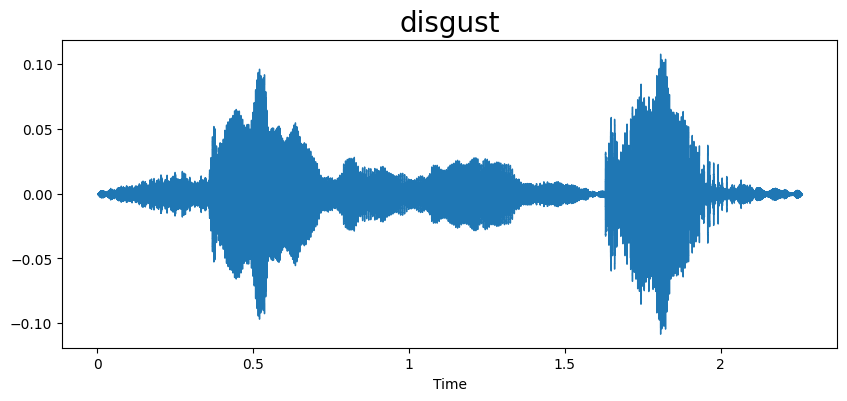

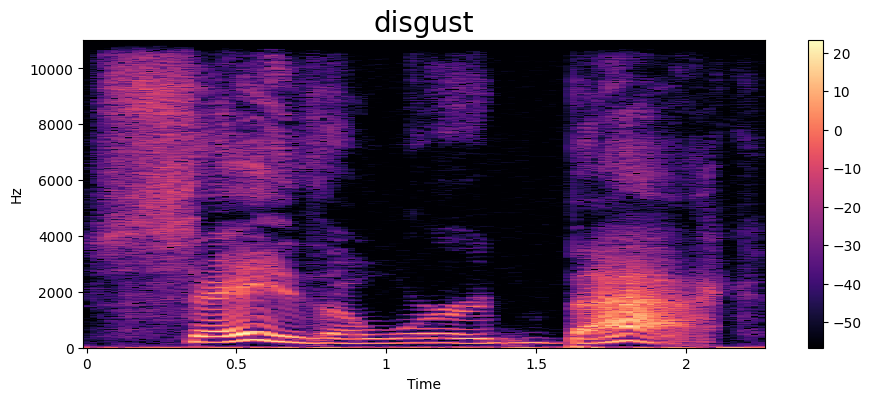

In [15]:
emotion=emot[1]
path=np.array(df["Path"][df["Label"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

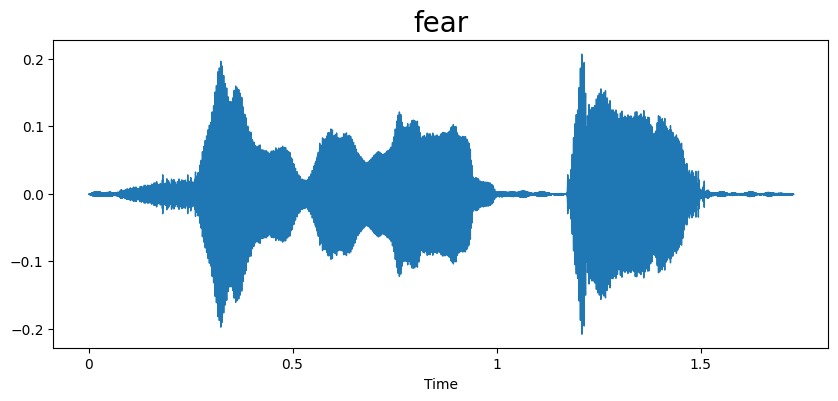

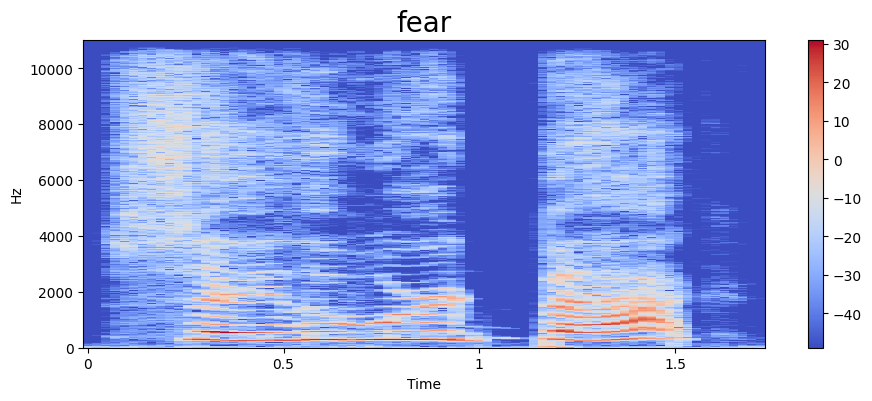

In [16]:
emotion=emot[2]
path=np.array(df["Path"][df["Label"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

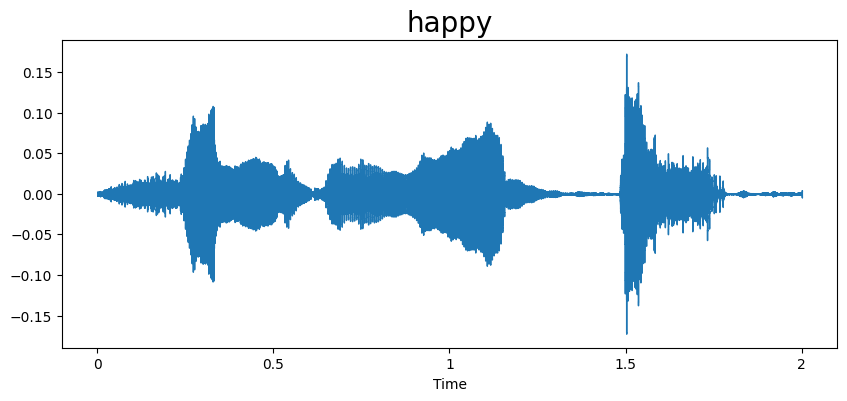

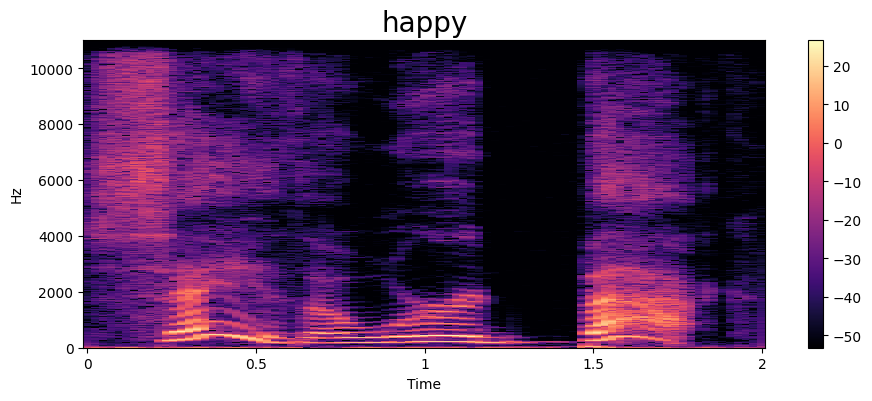

In [17]:
emotion=emot[3]
path=np.array(df["Path"][df["Label"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

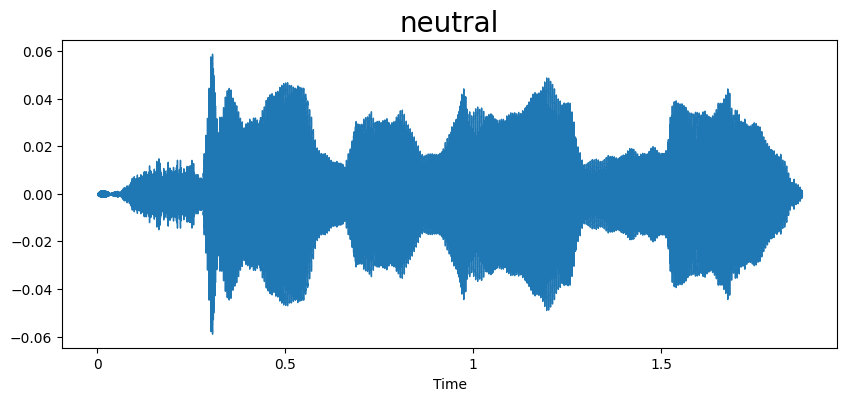

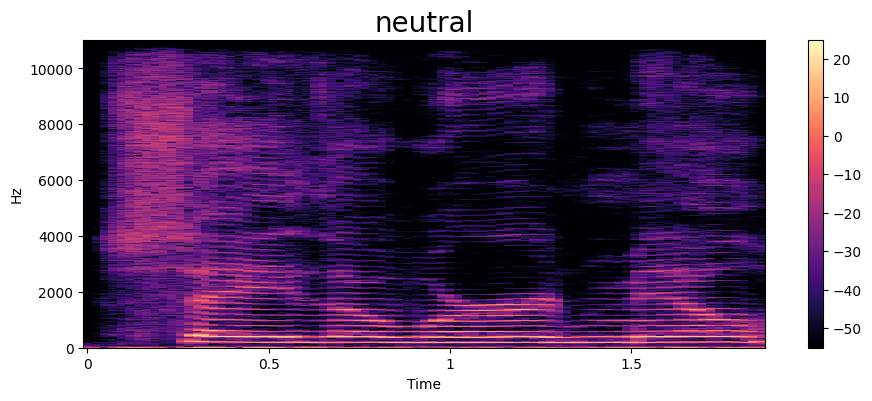

In [18]:
emotion=emot[4]
path=np.array(df["Path"][df["Label"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


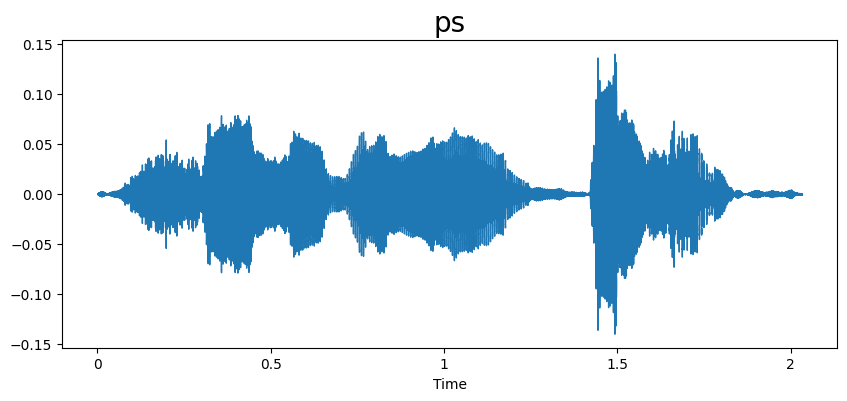

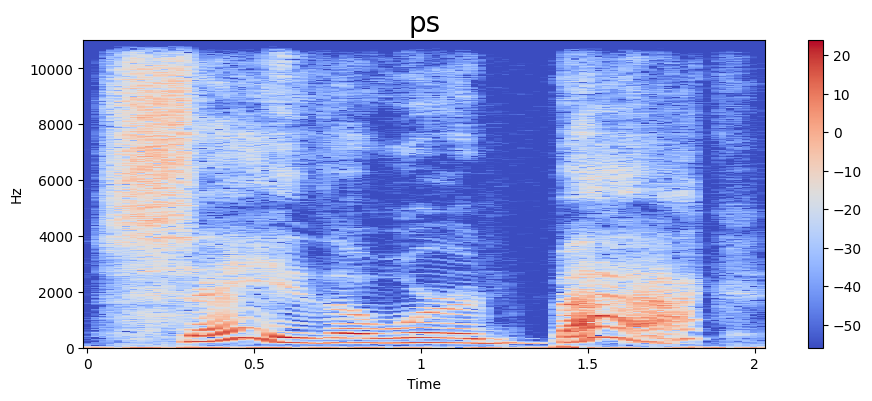

In [19]:
emotion=emot[5]
path=np.array(df["Path"][df["Label"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

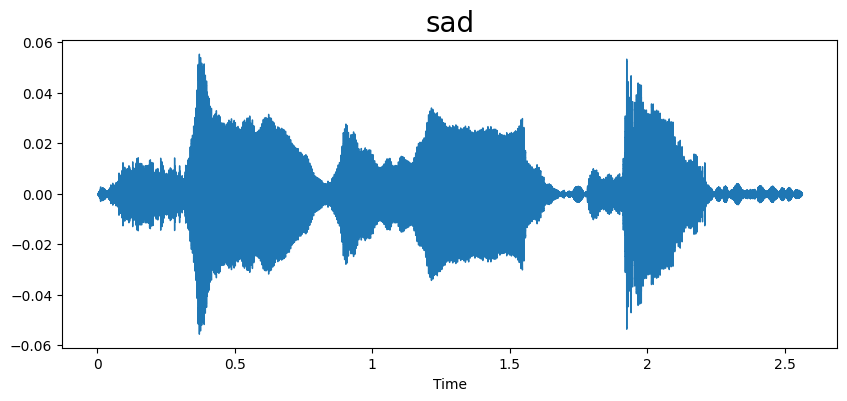

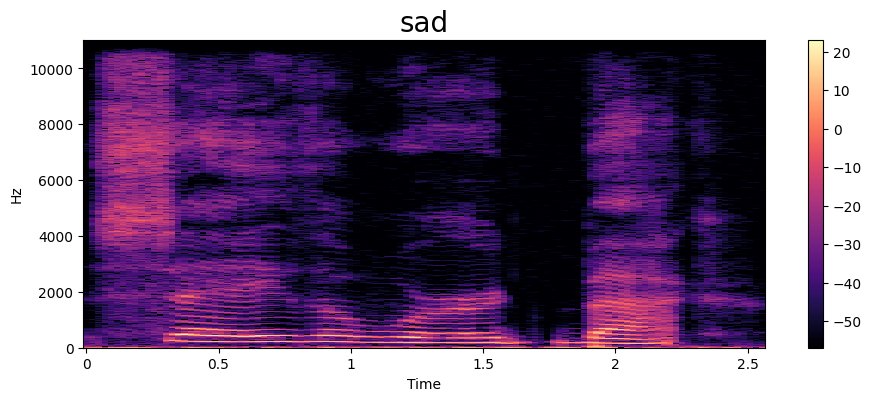

In [20]:
emotion=emot[6]
path=np.array(df["Path"][df["Label"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Data Augmentation

In [21]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
    
def additional_augmentation(data):
    # Applying existing augmentation functions in different combinations
    augmented_data = data.copy()

    # Applying noise and stretching
    augmented_data = stretch(noise(augmented_data), rate=0.8)

    # Applying shifting and pitch
    augmented_data = pitch(shift(augmented_data), sample_rate)


    return augmented_data
    

path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

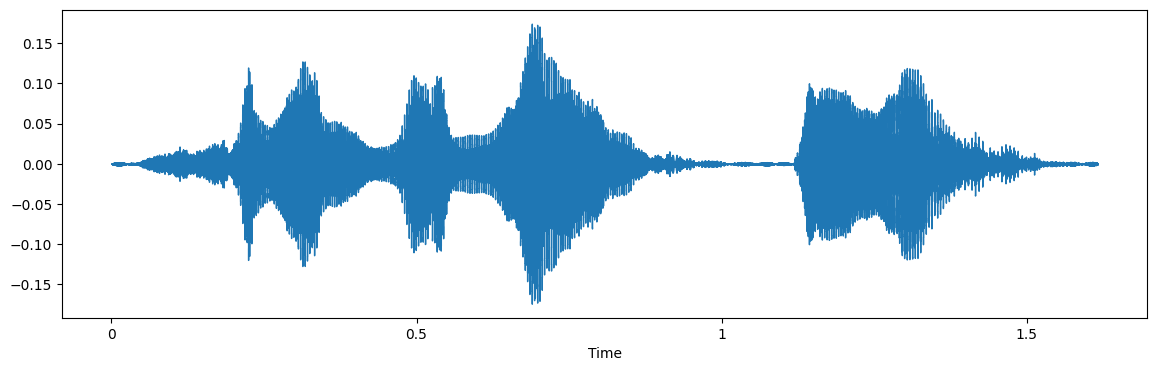

In [22]:
# simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

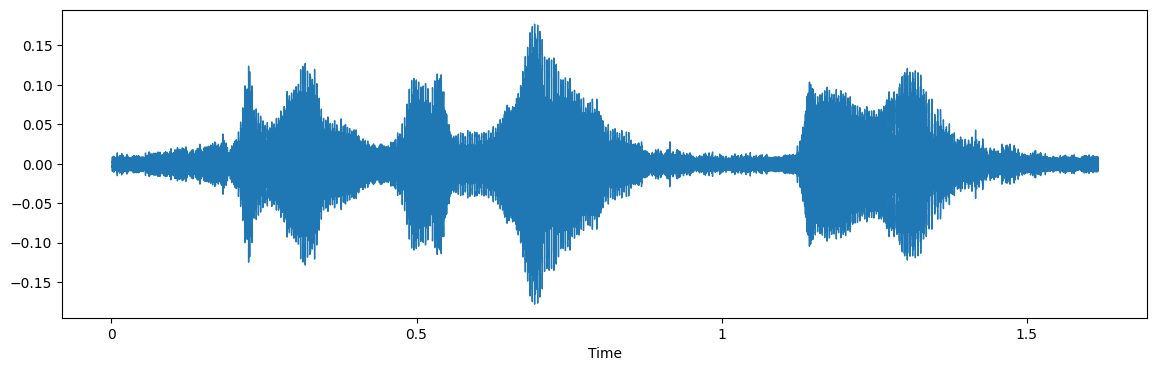

In [23]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


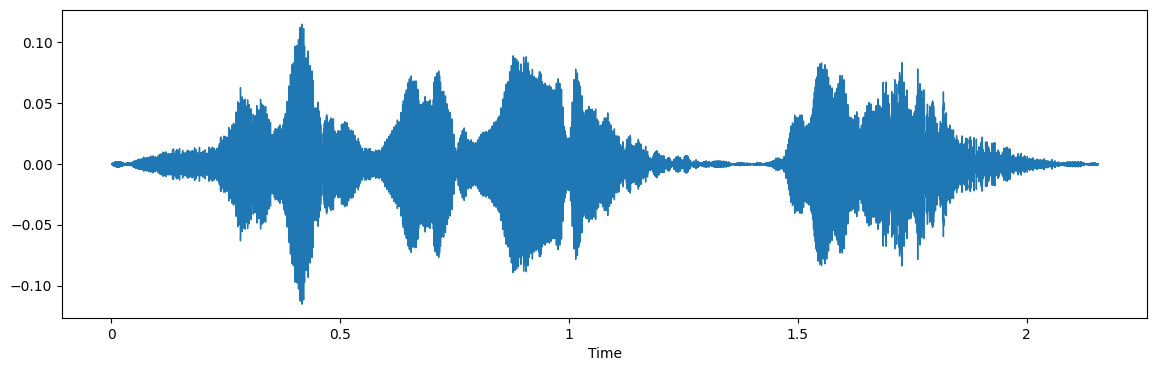

In [24]:
# stretching
def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate=rate)

x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


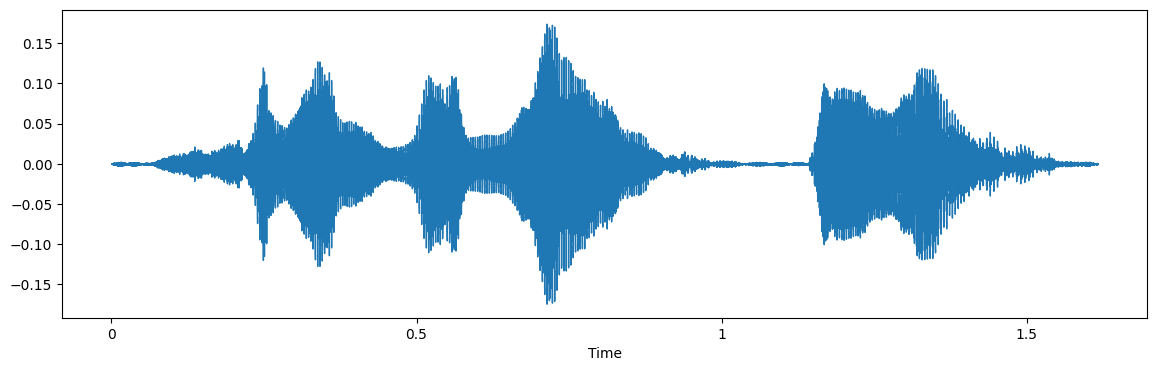

In [25]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

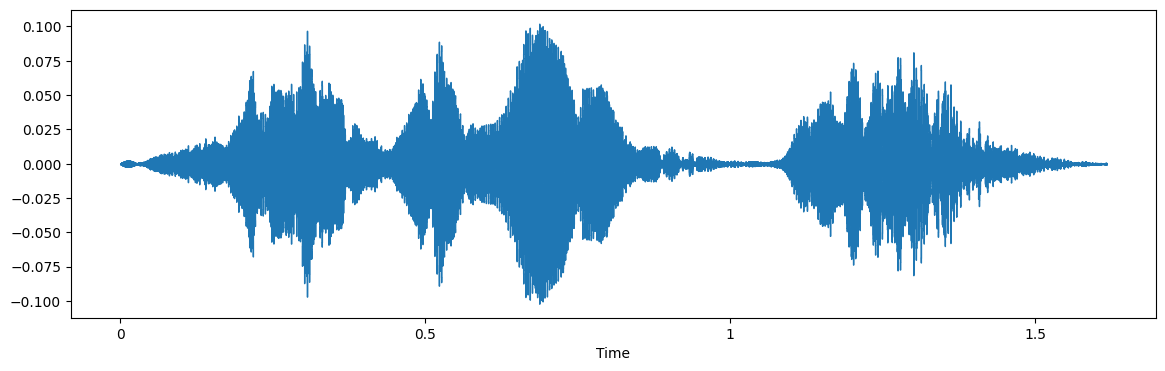

In [26]:
# pitch
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=int(pitch_factor * len(data) / sampling_rate))

x = pitch(data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


# Feature Extraction

In [27]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [30]:
extract_mfcc(df['Path'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [32]:
X_mfcc = df['Path'].apply(lambda x: extract_mfcc(x))
X_mfcc 

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: Path, Length: 2800, dtype: object

In [33]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [34]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['Label']])

In [37]:
y = y.toarray()
y.shape

(2800, 7)

In [39]:
len(X), len(y), df["Path"].shape


(2800, 2800, (2800,))

## Data Preparaion

In [43]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.20 , shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2240, 40, 1), (2240, 7), (560, 40, 1), (560, 7))

In [46]:
from sklearn.preprocessing import StandardScaler
# Reshape the training data to have two dimensions
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

# Apply StandardScaler to the reshaped data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)

# Reshape the testing data similarly
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)
x_test_scaled = scaler.transform(x_test_reshaped)

# Display shapes
x_train_scaled.shape, x_test_scaled.shape, y_train.shape,y_test.shape


((2240, 40), (560, 40), (2240, 7), (560, 7))

In [48]:
# Making our data compatible with the model.
x_train = np.expand_dims(x_train_scaled, axis=2)
x_test = np.expand_dims(x_test_scaled, axis=2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2240, 40, 1), (2240, 7), (560, 40, 1), (560, 7))

# Create the model

In [51]:

from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D((1)))
model.add(LSTM(64, return_sequences=True))  # Add LSTM layer
model.add(LSTM(32))  # Add another LSTM layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 38, 128)           512       
                                                                 
 batch_normalization_2 (Bat  (None, 38, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 38, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 256)           98560     
                                                                 
 batch_normalization_3 (Bat  (None, 36, 256)           1024      
 chNormalization)                                                
                                                      

In [52]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
model_22 = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])


Epoch 1/50
18/18 [==============================] - 8s 157ms/step - loss: 1.2949 - accuracy: 0.5598 - val_loss: 1.4126 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 2s 107ms/step - loss: 0.4641 - accuracy: 0.8272 - val_loss: 1.0819 - val_accuracy: 0.6268 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 2s 113ms/step - loss: 0.3517 - accuracy: 0.8763 - val_loss: 2.0528 - val_accuracy: 0.2607 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 2s 107ms/step - loss: 0.2329 - accuracy: 0.9254 - val_loss: 4.2588 - val_accuracy: 0.1411 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 2s 108ms/step - loss: 0.1477 - accuracy: 0.9496 - val_loss: 5.7145 - val_accuracy: 0.1304 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 2s 112ms/step - loss: 0.0877 - accuracy: 0.9728 - val_loss: 7.5999 - val_accuracy: 0.1304 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 2s 109ms/step - lo

18/18 [==============================] - 0s 13ms/step - loss: 0.0126 - accuracy: 0.9929
Testing accuracy of our model:  99.28571581840515 %


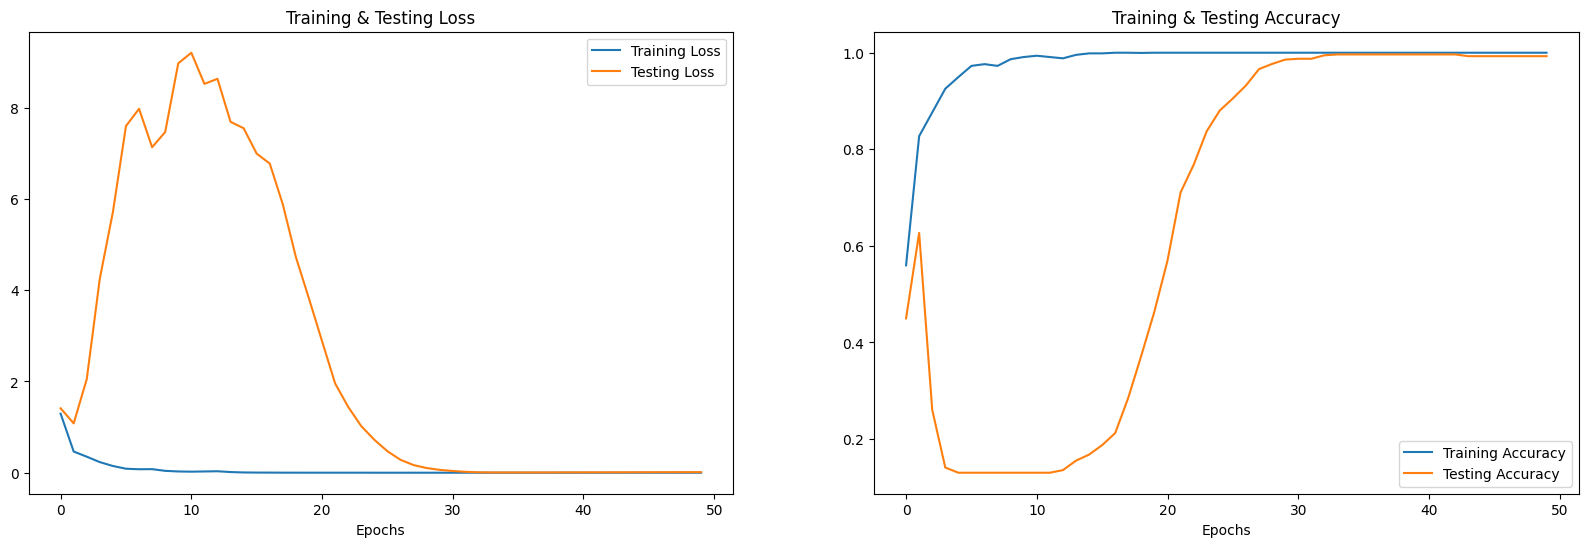

In [53]:
num_epochs=50

print("Testing accuracy of our model: " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [55]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = enc.inverse_transform(pred_test)

y_test = enc.inverse_transform(y_test)

18/18 [==============================] - 0s 11ms/step


In [56]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [57]:
c_df.sample(10)

,Predicted Labels,Actual Labels
432,happy,happy
401,angry,angry
363,happy,happy
174,disgust,disgust
468,fear,fear
326,angry,angry
426,ps,ps
187,sad,sad
322,fear,fear
18,angry,angry


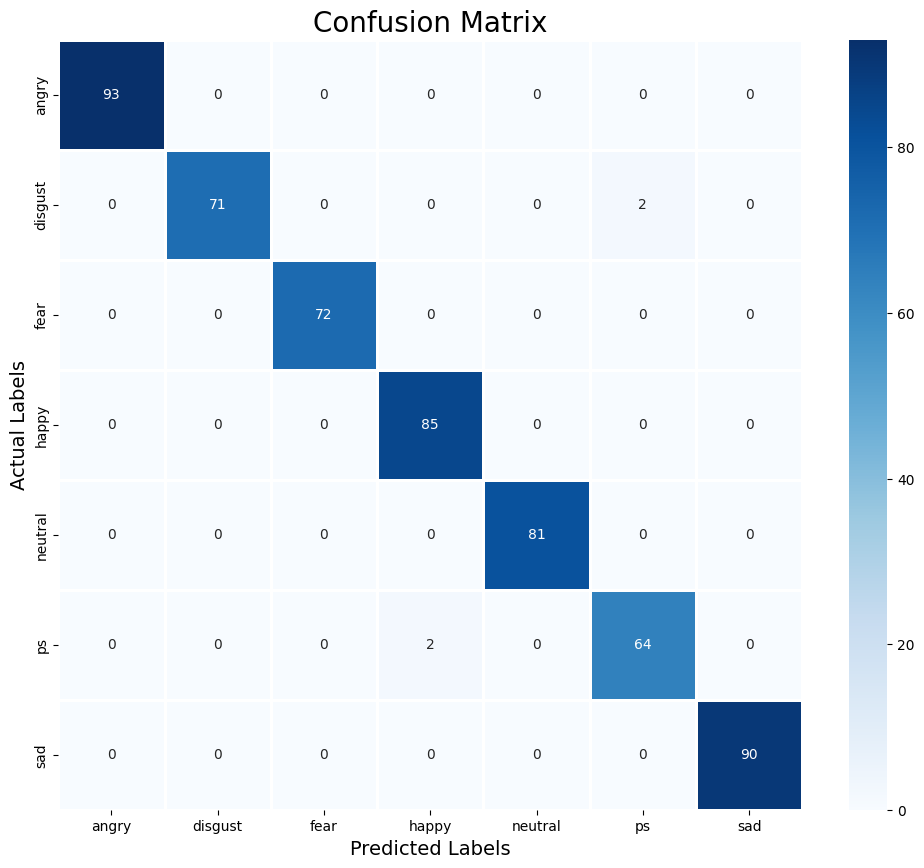

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        93
     disgust       1.00      0.97      0.99        73
        fear       1.00      1.00      1.00        72
       happy       0.98      1.00      0.99        85
     neutral       1.00      1.00      1.00        81
          ps       0.97      0.97      0.97        66
         sad       1.00      1.00      1.00        90

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



In [62]:
import joblib

joblib.dump(model, 'mlp_model.pkl') 
loaded_model = joblib.load('mlp_model.pkl')
